<a href="https://colab.research.google.com/github/peta-m175/rabbit_challenge/blob/master/deep_learning/day3/concept_of_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 再帰型ニューラルネットワークの概念

## RNNとは

時系列データに対応可能な、ニューラルネットワーク

## 時系列データ

時間的順序を追って一定間隔ごとに観察され，しかも相互に統計的依存関係が認められるようなデータの系列

例
- 音声データ
- テキストデータ

## RNNについて

$$
u^t=W_{(in)}x^t+Wz^{t-1}+b \\
z^t=f(W_{(in)}x^t+Wz^{t-1}+b)
$$
```
u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
z[:,t+1] = functions.sigmoid(u[:,t+1])
```
$$
v^t=W_{(out)}z^t+c \\
y^t=g(W_{(out)}z^t+c)
$$
```
np.dot(z[:,t+1].reshape(1, -1), W_out)
y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))
```

- 特徴
  - 時系列モデルを扱うには、初期の状態と過去の時間t-1の状態を保持し、そこから次の時間でのtを再帰的に求める再帰構造が必要になる

## BPTT

### BPTTとは

RNNにおいてのパラメータ調整方法の一種 -> 誤差逆伝播の一種

[誤差逆伝播はリンクで確認](https://colab.research.google.com/github/peta-m175/rabbit_challenge/blob/master/deep_learning/day1/backpropagation.ipynb)

### BPTTの数学的記述

$$
\frac{\partial E}{\partial W_{(in)}}=\frac{\partial E}{\partial u^t}\left[\frac{\partial u^t}{\partial W_{(in)}}\right]^T=\delta^t[x^t]^T
$$
```
np.dot(X.T, delta[:,t].reshape(1,-1))
```
$$
\frac{\partial E}{\partial W_{(out)}}=\frac{\partial E}{\partial v^t}\left[\frac{\partial v^t}{\partial W_{(out)}}\right]^T=\delta^{out,t}[z^t]^T
$$
```
np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
```
$$
\frac{\partial E}{\partial W}=\frac{\partial E}{\partial u^t}\left[\frac{\partial u^t}{\partial W}\right]^T=\delta^{t}[z^{t-1}]^T
$$
```
np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
```
$$
\frac{\partial E}{\partial b}=\frac{\partial E}{\partial u^t}\frac{\partial u^t}{\partial b}=\delta^t~~~~~~~~\frac{\partial u^t}{\partial b}=1 \\
\frac{\partial E}{\partial c}=\frac{\partial E}{\partial v^t}\frac{\partial v^t}{\partial c}=\delta^t~~~~~~~~\frac{\partial uvt}{\partial c}=1
$$

$$
u^t=W_{(in)}x^t+Wz^{t-1}+b
$$
```
u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
```
$$
z^t=f(W_{(in)}x^t+Wz^{t-1}+b)
$$
```
z[:,t+1] = functions.sigmoid(u[:,t+1])
```
$$
v^t=W_{(out)}z^t+c
$$
```
np.dot(z[:,t+1].reshape(1, -1), W_out)
```
$$
y^t=g(W_{(out)}z^t+c)
$$
```
y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))
```

$$
\frac{\partial E}{\partial u^t}
=\frac{\partial E}{\partial v^t}\frac{\partial v^t}{\partial u^t}
=\frac{\partial E}{\partial v^t}\frac{\partial \{W_{(out)}f(u^t)+c\}}{\partial u^t}
=f'(u^t)W_{(out)}^T\delta^{out,t}
=\delta^t
$$
```
delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
```
$$
\delta^{t-1}=\frac{\partial E}{\partial u^{t-1}}
=\frac{\partial E}{\partial u^t}\frac{\partial u^t}{\partial u^{t-1}}
=\delta^t\left\{
  \frac{\partial u^t}{\partial z^{t-1}}\frac{\partial z^{t-1}}{\partial u^{t-1}}
  \right\}
= \delta^t \left\{
  Wf'(u^{t-1})
  \right\} \\
\delta^{t-z-1}=\delta^{t-z} \left\{
  Wf'(u^{t-z-1})
  \right\}
$$

$$
W_{(in)}^{t+1}=W_{(in)}^{t}-\epsilon\frac{\partial E}{\partial W_{(in)}}=W_{(in)}^t-\epsilon\sum_{z=0}^{T_t}\delta^{t-z}\left[
  x^{t-z}
  \right]^T
$$
```
W_in -= learning_rate * W_in_grad
```
$$
W_{(out)}^{t+1}=W_{(out)}^{t}-\epsilon\frac{\partial E}{\partial W_{(out)}}=W_{(out)}^t-\epsilon\delta^{out,t}\left[
  z^t
  \right]^T
$$
```
W_out -= learning_rate * W_out_grad
```
$$
W^{t+1}=W^{t}-\epsilon\frac{\partial E}{\partial W}=W_{(in)}^t-\epsilon\sum_{z=0}^{T_t}\delta^{t-z}\left[
  z^{t-z-1}
  \right]^T
$$
```
W -= learning_rate * W_grad
```
$$
b^{t+1}
=b^t-\epsilon\frac{\partial E}{\partial b}=b^t-\epsilon\sum_{z=0}^{T_t}\delta^{t-z} \\
c^{t+1}
=c^t -\epsilon\frac{\partial E}{\partial c}
=c^t -\epsilon\delta^{out,t}
$$

### BPTTの全体像

$$
E^t=loss(y^t,d^t) \\
=loss(g(W_{(out)}z^t+c),d^t)\\
=loss(g(W_{(out)}f(W_{(in)}x^t+Wz^{t-1}+b)+c),d^t)
$$

## 確認テスト

### P.11

- Q:サイズ5×5の入力画像を、サイズ3×3のフィルタで畳み込んだ時の出力画像のサイズを答えよ。なおストライドは2、パディングは1とする。
- A:3x3
$$
OH=\frac{H+2P-FH}{S}+1=\frac{5+2\cdot 1-3}{2}+1=3 \\
OW=\frac{W+2P-FH}{S}+1=\frac{5+2\cdot 1-3}{2}+1=3
$$

### P.23

- Q: RNNのネットワークには大きくわけて3つの重みがある。1つは入力から現在の中間層を定義する際にかけられる重み、1つは中間層から出力を定義する際にかけられる重みである。残り1つの重みについて説明せよ。
- A:中間層から中間層に対する重み

### P.36

- Q: 連鎖律の原理を使い、$\frac{dz}{dx}$を求めよ。
$$
z=t^2\\
t=x+y
$$
- A:
$$
\frac{d z}{d x} = 2t \cdot 1 = 2t=2(x+y)\\
\frac{d z}{d x}=\frac{d z}{d t}\frac{d t}{d x}\\
z=t^2 \\
t=x+y\\
\frac{d z}{d t}=2t \\
\frac{d t}{d x}=1
$$

## P.45

- Q: 下図のy1をx・s0・s1・win・w・woutを用いて数式で表せ。※バイアスは任意の文字で定義せよ。※また中間層の出力にシグモイド関数g(x)を作用させよ。
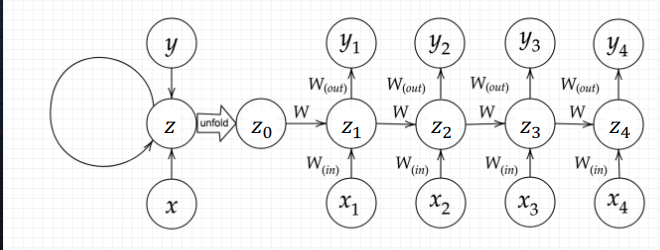

- A:
$$
z_1=sigmoid(S_0W+x_1W_{(in)}+b) \\
y_1=sigmoid(z_1W_{(out)}+c)
$$

## 演習

https://colab.research.google.com/github/peta-m175/rabbit_challenge/blob/master/deep_learning/day3/exercises/3_1_simple_RNN.ipynb